# Forest Fires

classify the Size_Categorie using SVM

month	month of the year: 'jan' to 'dec'
day	day of the week: 'mon' to 'sun'
FFMC	FFMC index from the FWI system: 18.7 to 96.20
DMC	DMC index from the FWI system: 1.1 to 291.3
DC	DC index from the FWI system: 7.9 to 860.6
ISI	ISI index from the FWI system: 0.0 to 56.10
temp	temperature in Celsius degrees: 2.2 to 33.30
RH	relative humidity in %: 15.0 to 100
wind	wind speed in km/h: 0.40 to 9.40
rain	outside rain in mm/m2 : 0.0 to 6.4
Size_Categorie 	the burned area of the forest ( Small , Large)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/forestfires.csv")
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# EDA

In [ ]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [ ]:
data.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,small


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:
data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [ ]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


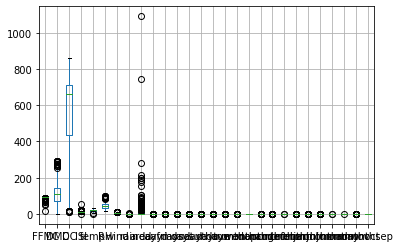

In [ ]:
data.boxplot()

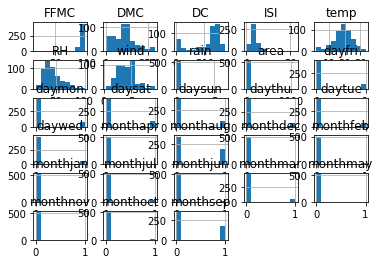

In [ ]:
data.hist()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


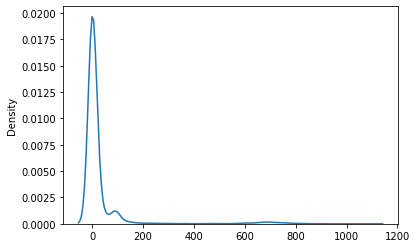

In [ ]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(random.normal(data.iloc[:,2:30]), hist=False)

plt.show()

In [ ]:
feature_names=['month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain',
               'area','dayfri','daymon','daysat','daysun','daythu','daytue',
               'daywed','monthapr','monthaug','monthdec','monthfeb','monthjan',
               'monthjul','monthjun','monthmar','monthmar','monthnov',
               'monthoct','monthsep']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.iloc[:,2:30]
Y = data.iloc[:,30]

In [ ]:
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y

0      small
1      small
2      small
3      small
4      small
       ...  
512    large
513    large
514    large
515    small
516    small
Name: size_category, Length: 517, dtype: object

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((413, 28), (413,), (104, 28), (104,))

### Importing SMV

In [ ]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

### Grid Search CV

In [ ]:
clf = SVC()
param_grid = [{'kernel':['linear','rbf'],'gamma':[0.5,0.1,0.01],'C':[10,0.1,0.001,0.0001] }]
gsv = RandomizedSearchCV(clf,param_grid,cv=10,verbose=300)
gsv.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START C=0.1, gamma=0.01, kernel=linear..........................
[CV 1/10; 1/10] END C=0.1, gamma=0.01, kernel=linear;, score=0.976 total time=   0.1s
[CV 2/10; 1/10] START C=0.1, gamma=0.01, kernel=linear..........................
[CV 2/10; 1/10] END C=0.1, gamma=0.01, kernel=linear;, score=0.976 total time=   0.0s
[CV 3/10; 1/10] START C=0.1, gamma=0.01, kernel=linear..........................
[CV 3/10; 1/10] END C=0.1, gamma=0.01, kernel=linear;, score=1.000 total time=   0.2s
[CV 4/10; 1/10] START C=0.1, gamma=0.01, kernel=linear..........................
[CV 4/10; 1/10] END C=0.1, gamma=0.01, kernel=linear;, score=0.976 total time=   0.1s
[CV 5/10; 1/10] START C=0.1, gamma=0.01, kernel=linear..........................
[CV 5/10; 1/10] END C=0.1, gamma=0.01, kernel=linear;, score=0.976 total time=   0.0s
[CV 6/10; 1/10] START C=0.1, gamma=0.01, kernel=linear..........................
[CV 6/10; 1/10] END C

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions=[{'C': [10, 0.1, 0.001, 0.0001],
                                         'gamma': [0.5, 0.1, 0.01],
                                         'kernel': ['linear', 'rbf']}],
                   verbose=300)

In [ ]:
gsv.best_params_ , gsv.best_score_ 

({'kernel': 'linear', 'gamma': 0.01, 'C': 10}, 0.9878629500580722)

### **Best Params= 'kernel': 'linear', 'gamma': 0.01, 'C': 10**

### **Best Score= 0.9878629500580722**

In [ ]:
clf = SVC(kernel='linear',C=10)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 100.0


array([[26,  0],
       [ 0, 78]])

In [ ]:
y_pred

array(['small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'large', 'small', 'small', 'small', 'small', 'small',
       'small', 'large', 'small', 'small', 'large', 'large', 'small',
       'small', 'small', 'large', 'small', 'small', 'small', 'large',
       'small', 'small', 'large', 'small', 'small', 'small', 'large',
       'small', 'small', 'small', 'small', 'small', 'large', 'small',
       'small', 'small', 'small', 'small', 'large', 'large', 'small',
       'small', 'small', 'small', 'large', 'large', 'small', 'small',
       'small', 'large', 'small', 'large', 'large', 'large', 'small',
       'small', 'small', 'small', 'small', 'small', 'large', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'large',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'large', 'large', 'large', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'large', 'small',
       'small', 'sma

## **Linear Accuracy = 99.03846153846155**

### RBF

In [ ]:
rbf= SVC(kernel='rbf',C=10)
rbf.fit(x_train , y_train)
y_pred_rbf = rbf.predict(x_test)
acc = accuracy_score(y_test, y_pred_rbf) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred_rbf)

Accuracy = 90.38461538461539


array([[16, 10],
       [ 0, 78]])

## **RBF Accuracy = 79.8076923076923**

In [ ]:
y_pred_rbf

array(['small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'large', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'large', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'large',
       'small', 'small', 'large', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'large', 'small', 'small',
       'small', 'small', 'small', 'large', 'large', 'small', 'small',
       'small', 'large', 'small', 'large', 'large', 'large', 'small',
       'small', 'small', 'small', 'small', 'small', 'large', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'large', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'sma

# Salary_data(Problem_statement)

1) Prepare a classification model using SVM for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **SalaryData_Train**

In [ ]:
data_train=pd.read_csv("/content/SalaryData_Train(1).csv")
data_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# EDA

In [ ]:
data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data_train.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
30160,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [ ]:
data_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
data_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


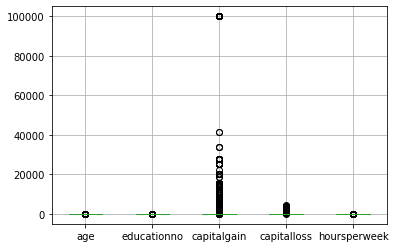

In [ ]:
data_train.boxplot()

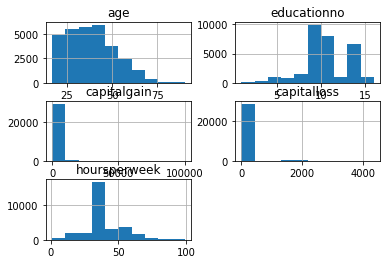

In [ ]:
data_train.hist()
plt.show()

In [ ]:
# for convert categorical to int

categorical = [col for col in data_train.columns if data_train[col].dtype==object]

for col in categorical:
    temp = {}
    count = 0
    for val in data_train[col].values:
        try:
            temp[val]
        except:
            temp[val] = count
            count += 1
    data_train[col] = [temp[x] for x in data_train[col].values]
print(data_train[categorical])

       workclass  education  maritalstatus  occupation  relationship  race  \
0              0          0              0           0             0     0   
1              1          0              1           1             1     0   
2              2          1              2           2             0     0   
3              2          2              1           2             1     1   
4              2          0              1           3             2     1   
...          ...        ...            ...         ...           ...   ...   
30156          2          6              1           9             2     0   
30157          2          1              1           8             1     0   
30158          2          1              6           0             4     0   
30159          2          1              0           0             3     0   
30160          5          1              1           1             2     0   

       sex  native  Salary  
0        0       0       0  
1    

In [ ]:
Y = data_train.iloc[:,13]

In [ ]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


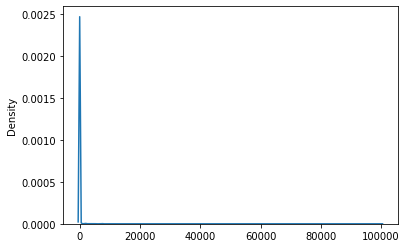

In [ ]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(random.normal(data_train.iloc[:,:13]), hist=False)

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data_train.iloc[:,:13]
Y = data_train.iloc[:,13]

In [ ]:
X

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,0,0,13,0,0,0,0,0,2174,0,40,0
1,50,1,0,13,1,1,1,0,0,0,0,13,0
2,38,2,1,9,2,2,0,0,0,0,0,40,0
3,53,2,2,7,1,2,1,1,0,0,0,40,0
4,28,2,0,13,1,3,2,1,1,0,0,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,6,12,1,9,2,0,1,0,0,38,0
30157,40,2,1,9,1,8,1,0,0,0,0,40,0
30158,58,2,1,9,6,0,4,0,1,0,0,40,0
30159,22,2,1,9,0,0,3,0,0,0,0,20,0


In [ ]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((24128, 13), (24128,), (6033, 13), (6033,))

# Importing SMV

In [ ]:
from sklearn.preprocessing import StandardScaler

# from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

### Grid Search CV

In [ ]:
clf = SVC()
param_grid = [{'kernel':['linear','rbf'],'gamma':[0.5,0.1,0.01],'C':[10,0.1,0.001,0.0001] }]
gsv = RandomizedSearchCV(clf,param_grid,cv=10,verbose=300)
gsv.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START C=0.001, gamma=0.5, kernel=linear.........................
[CV 1/10; 1/10] END C=0.001, gamma=0.5, kernel=linear;, score=0.806 total time= 1.2min
[CV 2/10; 1/10] START C=0.001, gamma=0.5, kernel=linear.........................
[CV 2/10; 1/10] END C=0.001, gamma=0.5, kernel=linear;, score=0.795 total time= 1.8min
[CV 3/10; 1/10] START C=0.001, gamma=0.5, kernel=linear.........................
[CV 3/10; 1/10] END C=0.001, gamma=0.5, kernel=linear;, score=0.801 total time= 1.4min
[CV 4/10; 1/10] START C=0.001, gamma=0.5, kernel=linear.........................


In [ ]:
gsv.best_params_ , gsv.best_score_ 

## **Best Params ='kernel': 'linear', 'gamma': 0.01, 'C': 10**  

## **Best Score =0.9879790940766551**

---



### Linear

In [ ]:
clf = SVC(kernel='linear',C=10)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

In [ ]:
y_pred

### RBF

In [ ]:
rbf= SVC(kernel='rbf',C=10)
rbf.fit(x_train , y_train)
y_pred_rbf = rbf.predict(x_test)
acc = accuracy_score(y_test, y_pred_rbf) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred_rbf)

In [ ]:
y_pred_rbf

# **SalaryData_Test**

In [ ]:
data_test=pd.read_csv("/content/SalaryData_Test(1).csv")

In [ ]:
# for convert categorical to int

categorical = [col for col in data_test.columns if data_test[col].dtype==object]

for col in categorical:
    temp = {}
    count = 0
    for val in data_test[col].values:
        try:
            temp[val]
        except:
            temp[val] = count
            count += 1
    data_test[col] = [temp[x] for x in data_test[col].values]
print(data_test[categorical])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data_test.iloc[:,:13]
Y = data_test.iloc[:,13]

In [ ]:
X

In [ ]:
Y

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

## Importing SMV

In [ ]:
from sklearn.preprocessing import StandardScaler

# from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
clf = SVC()
param_grid = [{'kernel':['linear','rbf'],'gamma':[0.5,0.1,0.01],'C':[10,0.1,0.001,0.0001] }]
gsv = RandomizedSearchCV(clf,param_grid,cv=10,verbose=300)
gsv.fit(x_train,y_train)

In [ ]:
gsv.best_params_ , gsv.best_score_ 

In [ ]:
clf = SVC(kernel='linear',C=10)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

In [ ]:
y_pred

# RBF

In [ ]:
rbf= SVC(kernel='rbf',C=10)
rbf.fit(x_train , y_train)
y_pred_rbf = rbf.predict(x_test)
acc = accuracy_score(y_test, y_pred_rbf) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred_rbf)

In [ ]:
y_pred_rbf